# **Libraries**

In [1]:
#텐서플로우 및 케라스 라이브러리 임포트
import PIL      #이미지 처리 라이브러리
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#넘파이 및 matplotlib import...matplotlib는 다양한 데이터를 그래프로
import numpy as np
import matplotlib.pyplot as plt

#텐서플로우 버전 확인
print(tf.__version__)

2.15.0


# **Uploading Data**

In [ ]:
fasion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fasion_mnist.load_data()
#import pathlib
#dataset_url = "http://arxiv.org/abs/1708.07747"
#data_dir = tf.keras.utils.get_file("dataset.tar.gz", origin=dataset_url, untar=True)
#data_dir = pathlib.Path(data_dir).parent / "dataset"

4422102/4422102 [==============================] - 0s 0us/step


**Counting the number of images**

In [ ]:
image_count=len(list(train_images))
print(image_count)
#image_count = len(list(data_dir.glob('**/*.jpg')))
#print(image_count)

60000


**Class names**

In [ ]:
class_names = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker','Bag','Ankel Boot']

Class number



*   0: T-shirt/top
*   1: Trouser
*   2: Pullover
*   3: Dress
*   4: Coat
*   5: Sandal
*   6: Shirt
*   7: Sneaker
*   8: Bag
*   9: Ankle boot

# **Checking some sample images**

**T-shirts**

In [ ]:
# Index of the first occurrence of T-shirt/top
#tshirt_index = np.where(train_labels == 0)[0][0]
tshirt_indecies = np.where(train_labels == 0)[0]

# Open and display the first T-shirt/top image
tshirt_image = Image.fromarray(train_images[tshirt_indecies[0]])
tshirt_image.show()

In [ ]:
#Second image of T-shirt/top
tshirt_image = Image.fromarray(train_images[tshirt_indecies[1]])
tshirt_image.show()

**Trousers**

In [ ]:
trouser_indecies = np.where(train_labels == 1)[0]
trouser_image = Image.fromarray(train_images[trouser_indecies[0]])
trouser_image.show()

In [ ]:
trouser_image = Image.fromarray(train_images[trouser_indecies[1]])
trouser_image.show()

# **Using Keras to load data**


*  Making a dataset


##**80% data for training**



In [ ]:
# Define batch size, image dimensions, and number of classes
batch_size = 32
img_height = 28
img_width = 28
num_classes = 10

In [ ]:
# Normalize pixel values to the range of 0-1
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Split the dataset into training and validation data
train_size = int(0.8 * train_images.shape[0])
val_size = train_images.shape[0] - train_size

# Create a TensorFlow Dataset for the training data
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.shuffle(10000).batch(batch_size)

# Create a TensorFlow Dataset for the validation data
val_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
val_ds = val_ds.batch(batch_size)


print("Training dataset size:", train_size)
print("Validation dataset size:", val_size)

Training dataset size: 48000
Validation dataset size: 12000


In [ ]:
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel Boot']


### **Visualizing the data**

*  The first 9 images of the dataset



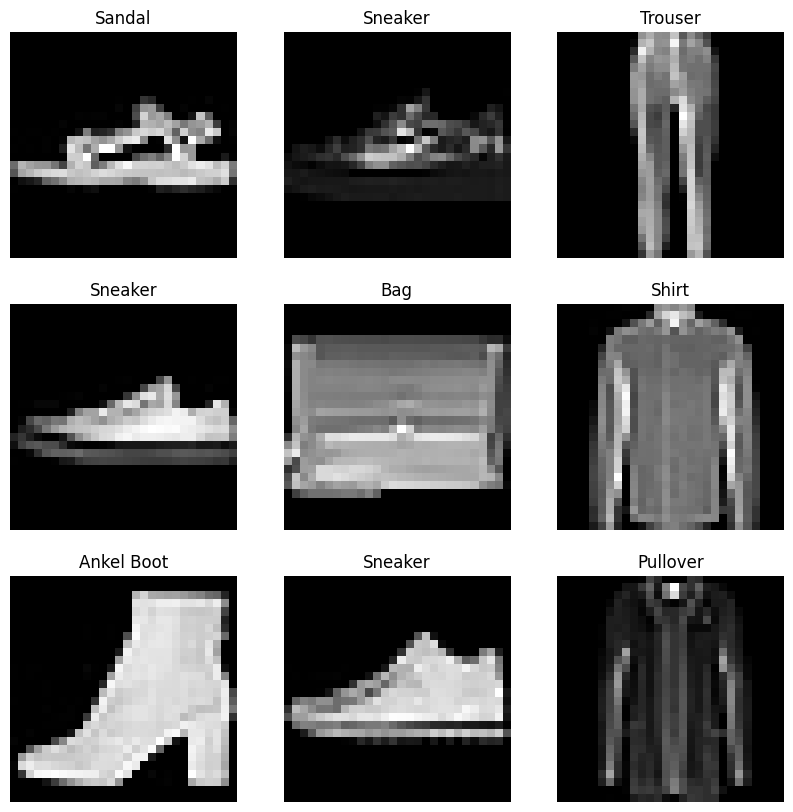

In [ ]:
# Display the first 9 images from the training dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().reshape(img_height, img_width), cmap="gray")
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
# Print the shape of image and label batches in the training dataset
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 28, 28)
(32,)


In [ ]:
# Configure the training dataset for better performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Define the model architecture
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])
    # Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          1

In [ ]:
# Train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
1875/1875 [==============================] - 26s 5ms/step - loss: 0.9074 - accuracy: 0.6599 - val_loss: 0.6589 - val_accuracy: 0.7522
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5915 - accuracy: 0.7817 - val_loss: 0.5645 - val_accuracy: 0.7954
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5089 - accuracy: 0.8128 - val_loss: 0.5040 - val_accuracy: 0.8211
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4566 - accuracy: 0.8328 - val_loss: 0.4752 - val_accuracy: 0.8289
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4196 - accuracy: 0.8459 - val_loss: 0.4443 - val_accuracy: 0.8369
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3915 - accuracy: 0.8558 - val_loss: 0.4139 - val_accuracy: 0.8478
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3697 - accuracy: 0.8646 - val_loss: 0.3918 - val_accurac

### **Graph**

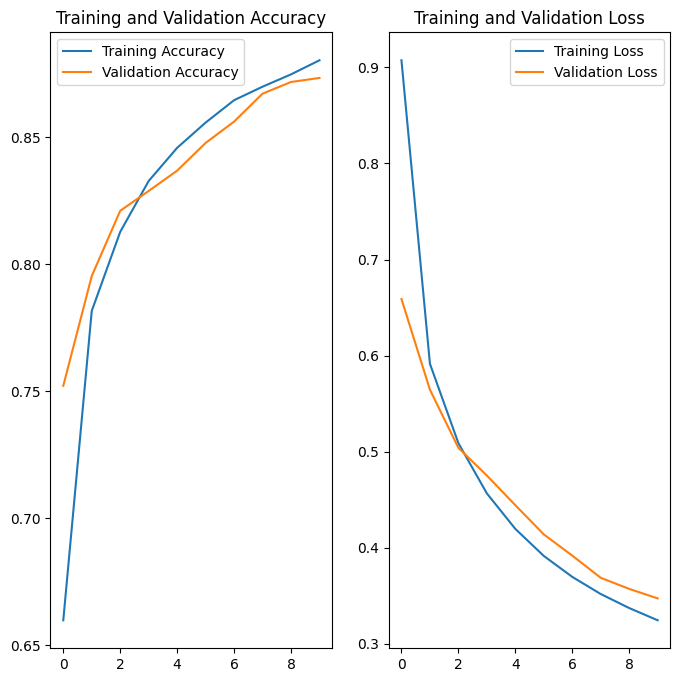

In [ ]:
# Plot the training and validation accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), history.history['accuracy'])
plt.plot(range(epochs), history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), history.history['loss'])
plt.plot(range(epochs), history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Training and Validation Loss')

plt.show()

# **Reducing the amount of training data**

## **1% of the data for training**

*   Validation data is 20% of the original data



In [ ]:
#텐서플로우 및 케라스 라이브러리 임포트
import PIL      #이미지 처리 라이브러리
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_datasets as tfds

#넘파이 및 matplotlib import...matplotlib는 다양한 데이터를 그래프로
import numpy as np
import matplotlib.pyplot as plt

#텐서플로우 버전 확인
print(tf.__version__)
import tensorflow_datasets as tfds

2.12.0


In [ ]:
#Calling the data again
fasion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fasion_mnist.load_data()

In [ ]:
# Define batch size, image dimensions, and number of classes
batch_size = 32
img_height = 28
img_width = 28
num_classes = 10

In [ ]:
# Normalize pixel values to the range of 0-1
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Split the dataset into training, validation, and test data
#train_size = int(0.3 * train_images.shape[0])
#val_size = int((2/7) * (train_images.shape[0] - train_size))
#test_size = train_images.shape[0] - train_size - val_size
val_size = int((0.2) * train_images.shape[0])
train_size = int(0.0125 * (train_images.shape[0] - val_size))
test_size = train_images.shape[0] - train_size - val_size

#dataset_name = 'fashion_mnist'
#split = ['train[:60%]', 'train[60%:80%]', 'train[80%:]']

#(train_ds, val_ds, test_ds), metadata = tfds.load(
#    name=dataset_name,
#    split=split,
#    shuffle_files=True,
#    with_info=True,
#    as_supervised=True
#)

# Create a TensorFlow Dataset for the training data
train_ds = tf.data.Dataset.from_tensor_slices((train_images[:train_size], train_labels[:train_size]))
train_ds = train_ds.shuffle(10000).batch(batch_size)

# Create a TensorFlow Dataset for the validation data
val_ds = tf.data.Dataset.from_tensor_slices((train_images[train_size:train_size+val_size], train_labels[train_size:train_size+val_size]))
val_ds = val_ds.batch(batch_size)

# Create a TensorFlow Dataset for the test data
test_ds = tf.data.Dataset.from_tensor_slices((train_images[train_size+val_size:], train_labels[train_size+val_size:]))
test_ds = test_ds.batch(batch_size)

print("Training dataset size:", train_size)
print("Validation dataset size:", val_size)
print("Test dataset size:", test_size)

Training dataset size: 600
Validation dataset size: 12000
Test dataset size: 47400


In [ ]:
IMG_SIZE = 28

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [ ]:
# Print the shape of image and label batches in the training dataset
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 28, 28)
(32,)


In [ ]:
# Configure the training dataset for better performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
print(img_height, img_width)

28 28


In [ ]:
# Define the model architecture
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)         

In [ ]:
# Train the model
epochs = 50
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/50
19/19 [==============================] - 3s 95ms/step - loss: 2.3033 - accuracy: 0.1100 - val_loss: 2.3025 - val_accuracy: 0.1037
Epoch 2/50
19/19 [==============================] - 1s 75ms/step - loss: 2.3017 - accuracy: 0.1100 - val_loss: 2.3019 - val_accuracy: 0.1037
Epoch 3/50
19/19 [==============================] - 1s 49ms/step - loss: 2.2994 - accuracy: 0.1100 - val_loss: 2.2974 - val_accuracy: 0.1037
Epoch 4/50
19/19 [==============================] - 1s 48ms/step - loss: 2.2867 - accuracy: 0.1100 - val_loss: 2.2651 - val_accuracy: 0.1037
Epoch 5/50
19/19 [==============================] - 1s 48ms/step - loss: 2.2110 - accuracy: 0.2300 - val_loss: 2.0973 - val_accuracy: 0.4005
Epoch 6/50
19/19 [==============================] - 1s 45ms/step - loss: 1.9164 - accuracy: 0.4017 - val_loss: 1.6222 - val_accuracy: 0.4947
Epoch 7/50
19/19 [==============================] - 1s 75ms/step - loss: 1.5220 - accuracy: 0.4667 - val_loss: 1.2802 - val_accuracy: 0.5167
Epoch 8/50
19

### **Graph**

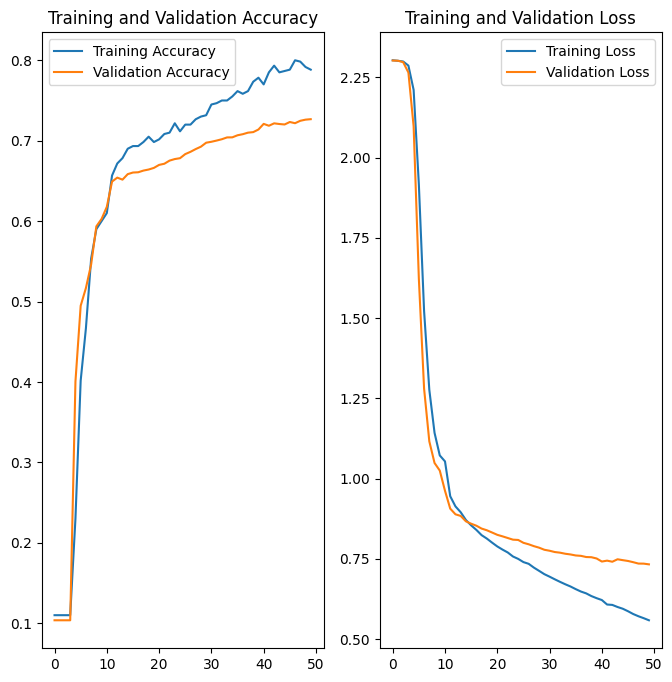

In [ ]:
# Plot the training and validation accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), history.history['accuracy'])
plt.plot(range(epochs), history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), history.history['loss'])
plt.plot(range(epochs), history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Training and Validation Loss')



plt.show()

# **Data augmentation**

In [ ]:
#텐서플로우 및 케라스 라이브러리 임포트
import PIL      #이미지 처리 라이브러리
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_datasets as tfds

#넘파이 및 matplotlib import...matplotlib는 다양한 데이터를 그래프로
import numpy as np
import matplotlib.pyplot as plt

#텐서플로우 버전 확인
print(tf.__version__)

2.12.0


In [ ]:
#한번 더 불러오기
fasion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fasion_mnist.load_data()

In [ ]:
# Define batch size, image dimensions, and number of classes
batch_size = 32
img_height = 28
img_width = 28
num_classes = 10

In [ ]:
# Normalize pixel values to the range of 0-1
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Split the dataset into training, validation, and test data
#train_size = int(0.6 * train_images.shape[0])
#val_size = int(0.5 * (train_images.shape[0] - train_size))
#test_size = train_images.shape[0] - train_size - val_size
val_size = int((0.2) * train_images.shape[0])
train_size = int(0.0125 * (train_images.shape[0] - val_size))
test_size = train_images.shape[0] - train_size - val_size

#dataset_name = 'fashion_mnist'
#split = ['train[:60%]', 'train[60%:80%]', 'train[80%:]']

#(train_ds, val_ds, test_ds), metadata = tfds.load(
#    name=dataset_name,
#    split=split,
#    shuffle_files=True,
#    with_info=True,
#    as_supervised=True
#)

# Create a TensorFlow Dataset for the training data
train_ds = tf.data.Dataset.from_tensor_slices((train_images[:train_size], train_labels[:train_size]))
train_ds = train_ds.shuffle(10000).batch(batch_size)

# Create a TensorFlow Dataset for the validation data
val_ds = tf.data.Dataset.from_tensor_slices((train_images[train_size:train_size+val_size], train_labels[train_size:train_size+val_size]))
val_ds = val_ds.batch(batch_size)

# Create a TensorFlow Dataset for the test data
test_ds = tf.data.Dataset.from_tensor_slices((train_images[train_size+val_size:], train_labels[train_size+val_size:]))
test_ds = test_ds.batch(batch_size)

print("Training dataset size:", train_size)
print("Validation dataset size:", val_size)
print("Test dataset size:", test_size)

Training dataset size: 600
Validation dataset size: 12000
Test dataset size: 47400


In [ ]:
IMG_SIZE = 28

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [ ]:
# Print the shape of image and label batches in the training dataset
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 28, 28)
(32,)


In [ ]:
# Configure the training dataset for better performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
print(img_height, img_width)

28 28


In [ ]:
# Data augmentation
data_augmentation = keras.Sequential(
  [
      layers.RandomFlip("horizontal_and_vertical"),
      layers.RandomRotation(0.2)
  ]
)

In [ ]:
# Define the model architecture
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 sequential_4 (Sequential)   (None, 28, 28, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                  

In [ ]:
# Train the model
epochs = 50
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/50
19/19 [==============================] - 4s 56ms/step - loss: 2.3041 - accuracy: 0.1083 - val_loss: 2.3026 - val_accuracy: 0.1021
Epoch 2/50
19/19 [==============================] - 1s 48ms/step - loss: 2.3025 - accuracy: 0.1100 - val_loss: 2.3027 - val_accuracy: 0.1021
Epoch 3/50
19/19 [==============================] - 1s 76ms/step - loss: 2.3022 - accuracy: 0.1100 - val_loss: 2.3028 - val_accuracy: 0.1021
Epoch 4/50
19/19 [==============================] - 1s 76ms/step - loss: 2.3021 - accuracy: 0.1100 - val_loss: 2.3029 - val_accuracy: 0.1021
Epoch 5/50
19/19 [==============================] - 1s 65ms/step - loss: 2.3019 - accuracy: 0.1100 - val_loss: 2.3030 - val_accuracy: 0.1021
Epoch 6/50
19/19 [==============================] - 1s 67ms/step - loss: 2.3018 - accuracy: 0.1100 - val_loss: 2.3032 - val_accuracy: 0.1021
Epoch 7/50
19/19 [==============================] - 1s 46ms/step - loss: 2.3017 - accuracy: 0.1100 - val_loss: 2.3033 - val_accuracy: 0.1021
Epoch 8/50
19

## **Graph**

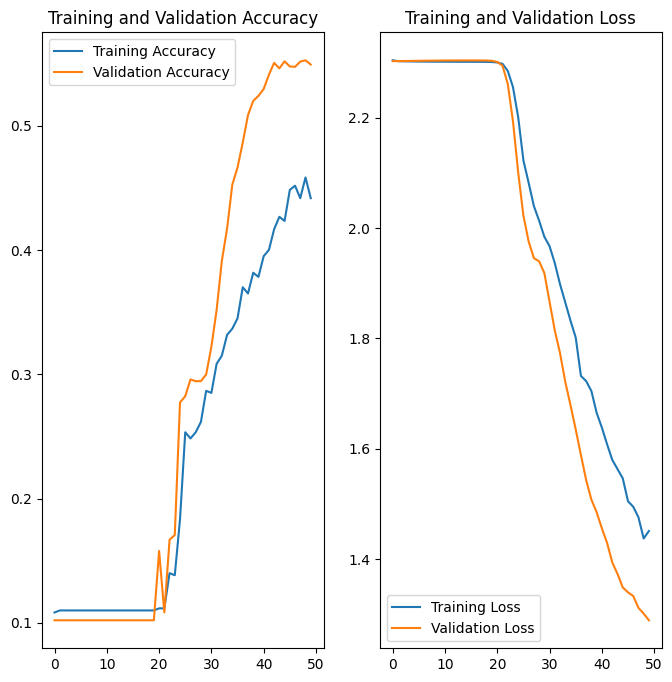

In [ ]:
# Plot the training and validation accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), history.history['accuracy'])
plt.plot(range(epochs), history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), history.history['loss'])
plt.plot(range(epochs), history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Training and Validation Loss')



plt.show()